In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = [5, 3.1]

# Today: A modelling example

Tom Ranner

# A model for the trajectory of an object

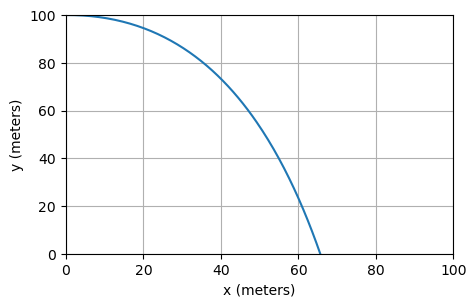

In [2]:
def projectile(n, t0, tfinal):
    t = np.zeros([n + 1, 1])  # Initialise the array t
    U = np.zeros([n + 1, 1])  # Initialise the array U
    V = np.zeros([n + 1, 1])  # Initialise the array V
    X = np.zeros([n + 1, 1])  # Initialise the array X
    Y = np.zeros([n + 1, 1])  # Initialise the array Y

    ## define initial conditions
    t[0] = 0.0
    U[0] = 20.0
    V[0] = 0.0
    X[0] = 0.0
    Y[0] = 100.0

    ## define constants
    k = 0.2
    g = 9.81

    ## Calculate size of each interval
    dt = (tfinal - t0) / float(n)

    ## Take n steps of Euler’s method
    for i in range(n):
        U[i + 1] = U[i] + dt * (-k * U[i])
        V[i + 1] = V[i] + dt * (-k * V[i] - g)
        X[i + 1] = X[i] + dt * U[i]
        Y[i + 1] = Y[i] + dt * V[i]
        t[i + 1] = t[i] + dt

    return t, X, Y, U, V


t0 = 0.0
tfinal = 6.0

for n in [160]:
    t, X, Y, U, V = projectile(n, t0, tfinal)
    plt.plot(X, Y)

plt.xlabel("x (meters)")
plt.ylabel("y (meters)")
plt.xlim(0.0, 100.0)
plt.ylim(0.0, 100.0)
plt.grid()
plt.show()

## Newton's laws of motion

- Important in many computer games is the **physics engine**
- This is often one of the computationally expensive parts of running a game
- Models often derived by working out the forces on an object and applying Newton's laws!

> Force = mass $\times$ acceleration

Newton's 2nd law of motion states that the accerlation of an object *in each direction* is equal to the applied force in that direction divided by the mass of the object.

-> once we know the acceleration of the object, we can solve the differential equation to calculate the objects velocity and position...

## Example - a projectile

Consider an object being projected from the top of a tall building

- We know its initial postion and speed *in each direction* and wish to predict is trajectory!

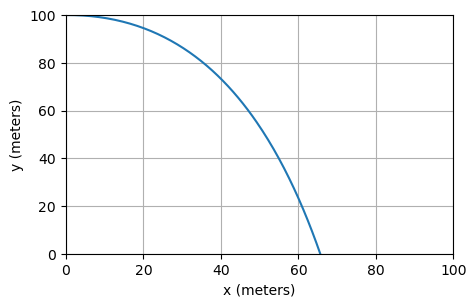

In [3]:
t0 = 0.0
tfinal = 6.0

for n in [160]:
    t, X, Y, U, V = projectile(n, t0, tfinal)
    plt.plot(X, Y)

plt.xlabel("x (meters)")
plt.ylabel("y (meters)")
plt.xlim(0.0, 100.0)
plt.ylim(0.0, 100.0)
plt.grid()
plt.show()

## Project example - the model

We consider a similar model to the freefall example from lecture 12.

The important *forces* are:

- **gravity** acts in the negative $y$ direction at a constant acceleration $g = 9.81 \, \mathrm{m} / \mathrm{s}^2$
- **air resistance** acts in the opposite direction to way the projectile is moving - in *both* the $x$ and $y$ directions. We assume the size of the force is proportional to the speed is each direction

## Projectile example - equations

Using the following notation

-   $X(t)$ is the horizontal distance of the object at time $t$
-   $Y(t)$ is the vertical distance of the object at time $t$
-   $U(t)$ is the horizontal speed of the object at time $t$
-   $V(t)$ is the vertical speed of the object at time $t$

The above model leads to the following two differential equations:

$$
\begin{aligned}
U'(t) & = -k U(t) \\
V'(t) & = -k V(t) - g.
\end{aligned}
$$

We also know, from the definition of speed, that

$$
\begin{aligned}
X'(t) & = U(t) \\
Y'(t) & = V(t).
\end{aligned}
$$

## Projectile example - initial conditions

In addition to the 4 differential equations, we need 4 starting values.

For example at $t = 0$,

$$
\begin{aligned}
U & = 20 \\
V & = 0 \\
X & = 0 \\
Y & = 100 \\
\end{aligned}
$$
    
(We're not going to write down the units any more but they are still there!)

## Projectile example - results

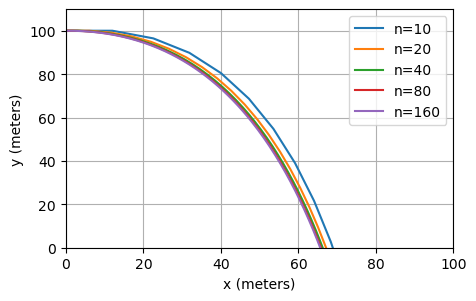

In [4]:
t0 = 0.0
tfinal = 6.0

for n in [10, 20, 40, 80, 160]:
    t, X, Y, U, V = projectile(n, t0, tfinal)
    plt.plot(X, Y, label=f"{n=}")

plt.xlabel("x (meters)")
plt.ylabel("y (meters)")
plt.xlim(0.0, 100.0)
plt.ylim(0.0, 110.0)
plt.legend()
plt.grid()
plt.show()

# Euler's method for systems of equations

In general, a system of four differential equations will take the form:

$$
\begin{aligned}
Y_1'(t) & = F_1(t, Y_1, Y_2, Y_3, Y_4) \\
Y_2'(t) & = F_2(t, Y_1, Y_2, Y_3, Y_4) \\
Y_3'(t) & = F_3(t, Y_1, Y_2, Y_3, Y_4) \\
Y_4'(t) & = F_4(t, Y_1, Y_2, Y_3, Y_4).
\end{aligned}
$$

-   How does this relate to the projectile example above?

-   It is possible to apply Euler's method or the midpoint method to apply Euler's method or the midpoint method to a general system such as this

## Solution using Euler's method

Consider the following system of differential equations:

$$
\vec{y}'(t) = A \vec{y}(t),
\quad \text{ subject to } \quad \vec{y}(0) = \begin{pmatrix} 0 \\ 1 \end{pmatrix},
$$

where $\vec{y}(t) = \begin{pmatrix} y_1(t) \\ y_2(t) \end{pmatrix}$ and $A = \begin{pmatrix} -1 & 1 \\ 1 & -2 \end{pmatrix}$.

-   Approximate the solution using 2 steps of Euler's method with $\mathrm{d}t = 0.5$.

## The Python version

Using Python notation each time step would be given by

``` python
y1[i + 1] = y1[i] + 0.5 * (-y1[i] + y2[i])
y2[i + 1] = y2[i] + 0.5 * (y1[i] - 2 * y2[i])
t[i + 1] = t[i] + 0.5
```

or

``` python
y[i + 1, :] = y[i, :] + 0.5 * A @ y[i, :]
t[i + 1] = t[i] + 0.5
```

## Python results

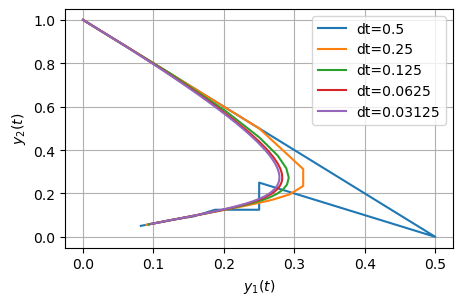

In [17]:
def exact(t):
    return np.array(
        [
            (np.exp(-1 / 2 * (3 + np.sqrt(5)) * t) * (np.exp(np.sqrt(5) * t) - 1))
            / np.sqrt(5),
            1
            / 10
            * np.exp(-1 / 2 * (3 + np.sqrt(5)) * t)
            * (-(np.sqrt(5) - 5) * np.exp(np.sqrt(5) * t) + 5 + np.sqrt(5)),
        ]
    )


headers = ["dt", "abs. error", "ratio"]
data = []
old_error = None

for N in range(5):
    T = 4.0
    dt = 0.5 ** (N + 1)
    n = int(T / dt)

    y0 = np.array([0, 1])
    t = 0.0

    y = np.empty([n + 1, 2])
    y[0, :] = y0

    for i in range(n):
        y[i + 1, 0] = y[i, 0] + dt * (-y[i, 0] + y[i, 1])
        y[i + 1, 1] = y[i, 1] + dt * (y[i, 0] - 2 * y[i, 1])
        t = t + dt

    error = np.linalg.norm(y[-1, :] - exact(T))

    if old_error is not None:
        ratio = error / old_error
    else:
        ratio = "---"
    old_error = error

    data.append([dt, error, ratio])

    plt.plot(y[:, 0], y[:, 1], label=f"{dt=}")

df = pd.DataFrame(data, columns=headers)

plt.xlabel("$y_1(t)$")
plt.ylabel("$y_2(t)$")
plt.grid(True)
plt.legend()
plt.show()

## What about errors?

We can use the Euclidean norm as before to calculate the error against an exact solution:

$$
\text{Abs. error} = \| \vec{y}_\text{exact} - \vec{y}(T) \|
$$

In [15]:
df.style.hide_index().set_caption(
    "Results of using Euler's method on a system of equtaions"
)

dt,abs. error,ratio
0.500000,0.017606,---
0.250000,0.008555,0.485941
0.125000,0.004219,0.493091
0.062500,0.002095,0.496579
0.031250,0.001044,0.498299


## Summary

-   Many useful models take the form of a single differential equation.

-   However, many important models require systems of *coupled differential equations* to be solved.

-   In the latter case we may generalise the standard techniques, such as Euler's method or the midpoint method, to get effective computational models.

-   Only 2 computational schemes have been introduced here (Euler and midpoint) - there are many more that we haven't considered...